# Pandas Groupby Magic

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
transactions    = pd.read_csv('sales_train.csv')
items           = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops           = pd.read_csv('shops.csv')

In [3]:
# Converting data coloum to datetime object
transactions['date'] = pd.to_datetime(transactions['date'], format="%d.%m.%Y")


In [4]:
transactions= transactions.set_index('date')


# Task

In [5]:
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 



In [7]:
# YOUR CODE GOES HERE
sep_2014= transactions[transactions.date_block_num==20]
# or
sep_2014= transactions.loc['2014-9',:]
sep_2014['sales']= sep_2014.iloc[:,3]*sep_2014.iloc[:,4]
sep_2014= sep_2014.reset_index()
sep_2014_gr= sep_2014.groupby('shop_id')['item_price', 'item_cnt_day', 'sales'].sum()
max_sale= sep_2014_gr['sales'].max()
print("Maximum Total Revenue: ", max_sale)


Maximum Total Revenue:  7982852.2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>


    
* Here we call "summer" the period from June to August.



In [8]:
# YOUR CODE GOES HERE
# Either
summer_sales_1= transactions[transactions.date_block_num==17]
summer_sales_2=transactions[transactions.date_block_num==18]
summer_sales_3=transactions[transactions.date_block_num==19]
summer_sales= pd.concat([summer_sales_1,summer_sales_2,summer_sales_3])
#or
summer_sales= transactions.loc['2014-6':'2014-8']

summer_sales['sales']= summer_sales['item_price']*summer_sales["item_cnt_day"]

summer_rev= summer_sales.groupby('item_id')[[ 'item_cnt_day', 'sales']].sum()

summer_rev=summer_rev.reset_index()

df= summer_rev.join(items, on= 'item_id',lsuffix='_gr', rsuffix='_im')

df_gr= df.groupby('item_category_id')['sales', 'item_cnt_day'].sum()

df_gr= df_gr.reset_index()

df_gr_max_idx= df_gr.sales.argmax()
print('idx_max_sale: ', df_gr_max_idx)

print('max_sale: ', df_gr.sales.max())

print(df_gr.iloc[15,0])


category_id_with_max_revenue = df_gr.iloc[15,0]# PUT YOUR ANSWER IN THIS VARIABLE
print('category_id_with_max_revenue', category_id_with_max_revenue)

idx_max_sale:  15
max_sale:  32157302.43
20
category_id_with_max_revenue 20


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [9]:
def data_range(series):
    return series.max()- series.min()
change= transactions.groupby("item_id")['item_price',"item_cnt_day"].agg(data_range)
No_change=change[change.item_price==0]
No_change.count()

num_items_constant_price=  5926
print('num_items_constant_price', num_items_constant_price)

num_items_constant_price 5926


Remember, the data can sometimes be noisy.

 <ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>



var 113261.112222
np_var 113262.11222222223
pd_var 113262.11222222223
pd_var_1 117167.70229885059


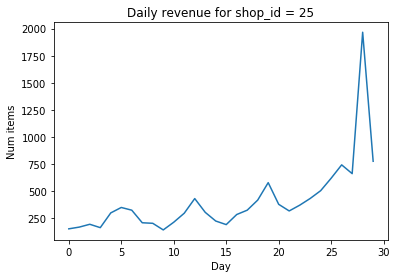

total_num_items_sold_var 117167.70229885059


In [10]:
shop_id = 25
Dec_14= transactions.loc['2014-12']
shop_25=Dec_14[Dec_14['shop_id']==25]
shop_25=shop_25.reset_index()
shop_25_gr= shop_25.groupby('date')['item_cnt_day','item_price'].sum()
shop_25_gr= shop_25_gr.reset_index()
def var(series):
    N= series.count()
    v_sqrt = (series - series.mean())**2
    variance = v_sqrt.sum()/N-1
    return variance
print('var', var(shop_25_gr.item_cnt_day))
print('np_var', np.var(shop_25_gr.item_cnt_day))
print('pd_var', shop_25_gr.item_cnt_day.var(ddof=0))
print('pd_var_1', shop_25_gr.item_cnt_day.var(ddof=1))

total_num_items_sold = shop_25_gr.item_cnt_day# YOUR CODE GOES HERE
days = shop_25_gr.index# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var =shop_25_gr.item_cnt_day.var(ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
print('total_num_items_sold_var', total_num_items_sold_var)